# Peringkasan Teks Abstraktif dengan BART

## Data Scraping + Merged Data

In [17]:
import pandas as pd
from datasets import Dataset

In [5]:
# Load the Dataset
df = pd.read_csv("C:/Users/HP 840 G8/Desktop/skripsi/data/arxiv dataset/Data Scraping arXiv.csv")
df

,Title,Link,Published,PDF Link,Authors,Summary,full_text
0,Clinical Trial Information Extraction with BERT,http://arxiv.org/abs/2110.10027v1,2021-09-11T17:15:10Z,http://arxiv.org/pdf/2110.10027v1,"Xiong Liu, Greg L. Hersch, Iya Khalil, Murthy ...",Natural language processing (NLP) of clinical ...,\n Clinical Trial Information Extraction with...
1,Extraction of Medication and Temporal Relation...,http://arxiv.org/abs/2310.02229v2,2023-10-03T17:37:22Z,http://arxiv.org/pdf/2310.02229v2,"Hangyu Tu, Lifeng Han, Goran Nenadic","Clinical texts, represented in electronic medi...",NaN
2,FinBERT-MRC: financial named entity recognitio...,http://arxiv.org/abs/2205.15485v1,2022-05-31T00:44:57Z,http://arxiv.org/pdf/2205.15485v1,"Yuzhe Zhang, Hong Zhang",Financial named entity recognition (FinNER) fr...,ARTICLE TEMPLATE\nFinBERT-MRC: nancial named ...
3,German BERT Model for Legal Named Entity Recog...,http://arxiv.org/abs/2303.05388v1,2023-03-07T11:54:39Z,http://arxiv.org/pdf/2303.05388v1,"Harshil Darji, Jelena Mitrović, Michael Granitzer","The use of BERT, one of the most popular langu...",arXiv:2303.05388v1 [cs.CL] 7 Mar 2023German ...
4,Exploring Multimodal Sentiment Analysis via CB...,http://arxiv.org/abs/2303.14708v1,2023-03-26T12:34:01Z,http://arxiv.org/pdf/2303.14708v1,"Huiru Wang, Xiuhong Li, Zenyu Ren, Dan Yang, c...",Because multimodal data contains more modal in...,NaN
...,...,...,...,...,...,...,...
3835,Proceedings of the Pacific Knowledge Acquisiti...,http://arxiv.org/abs/cs/0504071v1,2005-04-14T13:14:53Z,http://arxiv.org/pdf/cs/0504071v1,"Byeong Ho Kang, Achim Hoffmann, Takahira Yamag...",Artificial intelligence (AI) research has evol...,The Pacific Knowledge Acquisition Workshop2004...
3836,Fast Graph Condensation with Structure-based N...,http://arxiv.org/abs/2310.11046v2,2023-10-17T07:25:59Z,http://arxiv.org/pdf/2310.11046v2,"Lin Wang, Wenqi Fan, Jiatong Li, Yao Ma, Qing Li",The rapid development of Internet technology h...,Fast Graph Condensation with Structure-based N...
3837,Spyx: A Library for Just-In-Time Compiled Opti...,http://arxiv.org/abs/2402.18994v1,2024-02-29T09:46:44Z,http://arxiv.org/pdf/2402.18994v1,"Kade M. Heckel, Thomas Nowotny",As the role of artificial intelligence becomes...,arXiv:2402.18994v1 [cs.NE] 29 Feb 2024SPYX: ...
3838,Model-based Exception Mining for Object-Relati...,http://arxiv.org/abs/1807.00381v1,2018-07-01T19:42:02Z,http://arxiv.org/pdf/1807.00381v1,"Fatemeh Riahi, Oliver Schulte",This paper is based on a previous publication ...,Model-based Exception Mining for Object-Relati...


## Ekstraksi Full Text PDF

In [ ]:
!pip install nltk
!pip install requests beautifulsoup4 pandas
!pip install requests

In [ ]:
import pandas as pd
import time
import csv
import os
import requests

In [ ]:
import nltk
nltk.download('punkt')       # Tokenizer
nltk.download('stopwords')  # Stopword list
nltk.download('wordnet')    # WordNet lemmatizer

In [ ]:
# Membuat folder untuk menyimpan PDF
os.makedirs('arxiv_pdfs', exist_ok=True)

def download_pdf(pdf_link, save_path):
    try:
        response = requests.get(pdf_link, stream=True)
        if response.status_code == 200:
            with open(save_path, 'wb') as file:
                file.write(response.content)
            print(f"Downloaded: {save_path}")
        else:
            print(f"Failed to download {pdf_link}: {response.status_code}")
    except Exception as e:
        print(f"Error downloading {pdf_link}: {e}")

In [ ]:
for index, row in df.iterrows():
    pdf_link = row['PDF Link']
    response = requests.head(pdf_link)
    if response.status_code == 404:
        print(f"Invalid URL: {pdf_link}")

In [ ]:
import requests

def is_valid_url(url):
    try:
        response = requests.head(url, timeout=5)
        return response.status_code == 200
    except requests.exceptions.RequestException:
        return False

df['Valid URL'] = df['PDF Link'].apply(is_valid_url)

In [ ]:
df_valid = df[df['Valid URL'] == True].reset_index(drop=True)

In [ ]:
df_valid.to_csv("valid_pdf_links.csv", index=False)

In [ ]:
invalid_urls = df[df['Valid URL'] == False]
print(invalid_urls)

### Mengunduh File PDF

In [ ]:
import os
import requests

def download_pdf(pdf_link, save_path):
    try:
        response = requests.get(pdf_link, timeout=10)
        if response.status_code == 200:
            with open(save_path, 'wb') as file:
                file.write(response.content)
            print(f"Downloaded: {save_path}")
        else:
            print(f"Failed to download {pdf_link}: {response.status_code}")
    except requests.exceptions.RequestException as e:
        print(f"Error downloading {pdf_link}: {e}")

In [ ]:
if not os.path.exists("arxiv_pdfs"):
    os.makedirs("arxiv_pdfs")

In [ ]:
# unduh semua pdf
for index, row in df.iterrows():
    pdf_link = row['PDF Link']
    save_path = f"arxiv_pdfs/article_{index + 1}.pdf"
    download_pdf(pdf_link, save_path)

### Ekstraksi Teks

In [ ]:
!pip install PyPDF2

In [ ]:
import os
import pandas as pd
import requests
from PyPDF2 import PdfReader

In [ ]:
# Fungsi untuk mengunduh file PDF
def download_pdf(pdf_url, save_path):
    try:
        response = requests.get(pdf_url, stream=True)
        if response.status_code == 200:
            with open(save_path, 'wb') as file:
                file.write(response.content)
            print(f"Berhasil mengunduh: {save_path}")
        else:
            print(f"Gagal mengunduh: {pdf_url}, status: {response.status_code}")
    except Exception as e:
        print(f"Error saat mengunduh {pdf_url}: {e}")

In [ ]:
# Fungsi untuk membaca teks dari file PDF
def extract_text_from_pdf(pdf_path):
    try:
        reader = PdfReader(pdf_path)
        full_text = " ".join([page.extract_text() for page in reader.pages if page.extract_text()])
        return full_text
    except Exception as e:
        print(f"Error membaca PDF {pdf_path}: {e}")
        return None

In [ ]:
# Folder untuk menyimpan file PDF
pdf_dir = "pdfs_arxiv_data"
os.makedirs(pdf_dir, exist_ok=True)

In [ ]:
# Kolom untuk menyimpan teks penuh
df['full_text'] = None

In [ ]:
# Unduh dan ekstrak teks dari PDF
for index, row in df.iterrows():
    pdf_link = row.get('PDF Link', None)  # Kolom 'PDF Link' mengandung URL file PDF
    title = row.get('Title', f"article_{index + 1}").replace(" ", "_")  # Format nama file
    save_path = os.path.join(pdf_dir, f"{title}.pdf")
    
    if pdf_link:
        # Unduh file PDF
        download_pdf(pdf_link, save_path)
        
        # Ekstrak teks dari PDF
        full_text = extract_text_from_pdf(save_path)
        df.at[index, 'full_text'] = full_text
    else:
        print(f"Tidak ada link PDF untuk baris {index + 1}")

In [ ]:
# Fungsi untuk mengekstrak teks dari PDF
def extract_text_from_pdf(pdf_path):
    try:
        reader = PdfReader(pdf_path)
        text = ""
        for page in reader.pages:
            text += page.extract_text() or ""  # Menangani halaman tanpa teks
        return text.strip()
    except Exception as e:
        print(f"Gagal mengekstrak teks dari {pdf_path}: {e}")
        return ""# Fungsi untuk membersihkan karakter tidak valid
def remove_invalid_characters(text):
    if isinstance(text, str):
        return text.encode('utf-8', 'ignore').decode('utf-8', 'ignore')
    return text

In [ ]:
# Terapkan pembersihan karakter tidak valid ke semua kolom string
for column in df.select_dtypes(include=['object']):
    df[column] = df[column].apply(remove_invalid_characters)

In [ ]:
# Simpan dataset ke CSV
output_path = "Data Ekstraksi Full Text.csv" # 
try:
    df.to_csv(output_path, index=False, encoding='utf-8')
    print(f"Dataset berhasil disimpan di: {output_path}")
except UnicodeEncodeError as e:
    print(f"UnicodeEncodeError: {e}. Mencoba menyimpan dengan encoding alternatif...")
    # Simpan dengan encoding alternatif
    df.to_csv(output_path, index=False, encoding='utf-8-sig')
    print(f"Dataset berhasil disimpan dengan encoding alternatif di: {output_path}")

In [12]:
df = pd.read_csv("C:/Users/HP 840 G8/Desktop/skripsi/data/arxiv dataset/Data Ekstraksi Full Text.csv")
df

,Title,Link,Published,PDF Link,Authors,Summary,full_text
0,Clinical Trial Information Extraction with BERT,http://arxiv.org/abs/2110.10027v1,2021-09-11T17:15:10Z,http://arxiv.org/pdf/2110.10027v1,"Xiong Liu, Greg L. Hersch, Iya Khalil, Murthy ...",Natural language processing (NLP) of clinical ...,\n Clinical Trial Information Extraction with...
1,Extraction of Medication and Temporal Relation...,http://arxiv.org/abs/2310.02229v2,2023-10-03T17:37:22Z,http://arxiv.org/pdf/2310.02229v2,"Hangyu Tu, Lifeng Han, Goran Nenadic","Clinical texts, represented in electronic medi...",NaN
2,FinBERT-MRC: financial named entity recognitio...,http://arxiv.org/abs/2205.15485v1,2022-05-31T00:44:57Z,http://arxiv.org/pdf/2205.15485v1,"Yuzhe Zhang, Hong Zhang",Financial named entity recognition (FinNER) fr...,ARTICLE TEMPLATE\nFinBERT-MRC: nancial named ...
3,German BERT Model for Legal Named Entity Recog...,http://arxiv.org/abs/2303.05388v1,2023-03-07T11:54:39Z,http://arxiv.org/pdf/2303.05388v1,"Harshil Darji, Jelena Mitrović, Michael Granitzer","The use of BERT, one of the most popular langu...",arXiv:2303.05388v1 [cs.CL] 7 Mar 2023German ...
4,Exploring Multimodal Sentiment Analysis via CB...,http://arxiv.org/abs/2303.14708v1,2023-03-26T12:34:01Z,http://arxiv.org/pdf/2303.14708v1,"Huiru Wang, Xiuhong Li, Zenyu Ren, Dan Yang, c...",Because multimodal data contains more modal in...,NaN
...,...,...,...,...,...,...,...
3835,Proceedings of the Pacific Knowledge Acquisiti...,http://arxiv.org/abs/cs/0504071v1,2005-04-14T13:14:53Z,http://arxiv.org/pdf/cs/0504071v1,"Byeong Ho Kang, Achim Hoffmann, Takahira Yamag...",Artificial intelligence (AI) research has evol...,The Pacific Knowledge Acquisition Workshop2004...
3836,Fast Graph Condensation with Structure-based N...,http://arxiv.org/abs/2310.11046v2,2023-10-17T07:25:59Z,http://arxiv.org/pdf/2310.11046v2,"Lin Wang, Wenqi Fan, Jiatong Li, Yao Ma, Qing Li",The rapid development of Internet technology h...,Fast Graph Condensation with Structure-based N...
3837,Spyx: A Library for Just-In-Time Compiled Opti...,http://arxiv.org/abs/2402.18994v1,2024-02-29T09:46:44Z,http://arxiv.org/pdf/2402.18994v1,"Kade M. Heckel, Thomas Nowotny",As the role of artificial intelligence becomes...,arXiv:2402.18994v1 [cs.NE] 29 Feb 2024SPYX: ...
3838,Model-based Exception Mining for Object-Relati...,http://arxiv.org/abs/1807.00381v1,2018-07-01T19:42:02Z,http://arxiv.org/pdf/1807.00381v1,"Fatemeh Riahi, Oliver Schulte",This paper is based on a previous publication ...,Model-based Exception Mining for Object-Relati...


## Preprocessing Data

### Cleaning Data

In [13]:
df = pd.read_csv("C:/Users/HP 840 G8/Desktop/skripsi/data/arxiv dataset/Data Cleaning.csv")
df

,Title,Link,Published,PDF Link,Authors,Summary,full_text
0,Clinical Trial Information Extraction with BERT,http://arxiv.org/abs/2110.10027v1,2021-09-11T17:15:10Z,http://arxiv.org/pdf/2110.10027v1,"Xiong Liu, Greg L. Hersch, Iya Khalil, Murthy ...",Natural language processing (NLP) of clinical ...,Clinical Trial Information Extraction with BER...
1,FinBERT-MRC: financial named entity recognitio...,http://arxiv.org/abs/2205.15485v1,2022-05-31T00:44:57Z,http://arxiv.org/pdf/2205.15485v1,"Yuzhe Zhang, Hong Zhang",Financial named entity recognition (FinNER) fr...,FinBERTMRC nancial named entity recognition us...
2,German BERT Model for Legal Named Entity Recog...,http://arxiv.org/abs/2303.05388v1,2023-03-07T11:54:39Z,http://arxiv.org/pdf/2303.05388v1,"Harshil Darji, Jelena Mitrović, Michael Granitzer","The use of BERT, one of the most popular langu...",cs.CL 7 Mar 2023German BERT Model for Legal Na...
3,WCL-BBCD: A Contrastive Learning and Knowledge...,http://arxiv.org/abs/2203.06925v5,2022-03-14T08:29:58Z,http://arxiv.org/pdf/2203.06925v5,"Renjie Zhou, Qiang Hu, Jian Wan, Jilin Zhang, ...",Named Entity Recognition task is one of the co...,1 WCLBBCD A Contrastive Learning and Knowledge...
4,Supplementary Features of BiLSTM for Enhanced ...,http://arxiv.org/abs/2305.19928v4,2023-05-31T15:05:25Z,http://arxiv.org/pdf/2305.19928v4,"Conglei Xu, Kun Shen, Hongguang Sun",Sequence labeling tasks require the computatio...,1 Supplementary Features of BiLSTM for Enhance...
...,...,...,...,...,...,...,...
2313,AI-Aided Kalman Filters,http://arxiv.org/abs/2410.12289v1,2024-10-16T06:47:53Z,http://arxiv.org/pdf/2410.12289v1,"Nir Shlezinger, Guy Revach, Anubhab Ghosh, Sai...",The Kalman filter (KF) and its variants are am...,"AIAided Kalman Filters Nir Shlezinger, Senior ..."
2314,Proceedings of the Pacific Knowledge Acquisiti...,http://arxiv.org/abs/cs/0504071v1,2005-04-14T13:14:53Z,http://arxiv.org/pdf/cs/0504071v1,"Byeong Ho Kang, Achim Hoffmann, Takahira Yamag...",Artificial intelligence (AI) research has evol...,The Pacific Knowledge Acquisition Workshop2004...
2315,Fast Graph Condensation with Structure-based N...,http://arxiv.org/abs/2310.11046v2,2023-10-17T07:25:59Z,http://arxiv.org/pdf/2310.11046v2,"Lin Wang, Wenqi Fan, Jiatong Li, Yao Ma, Qing Li",The rapid development of Internet technology h...,Fast Graph Condensation with Structurebased Ne...
2316,Spyx: A Library for Just-In-Time Compiled Opti...,http://arxiv.org/abs/2402.18994v1,2024-02-29T09:46:44Z,http://arxiv.org/pdf/2402.18994v1,"Kade M. Heckel, Thomas Nowotny",As the role of artificial intelligence becomes...,cs.NE 29 Feb 2024SPYX A L IBRARY FOR JUSTINTIM...


### Normalisasi

In [ ]:
import re

# Normalisasi teks
def normalize_text(text):
    text = text.lower()  # Ubah ke huruf kecil
    text = re.sub(r'\d+', '', text)  # Hapus angka
    text = re.sub(r'[^\w\s]', '', text)  # Hapus tanda baca
    text = re.sub(r'\s+', ' ', text).strip()  # Hapus spasi berlebih
    return text

df['clean_text'] = df['full_text'].apply(normalize_text)

### Tokenization

In [ ]:
from nltk.tokenize import word_tokenize

# Tokenisasi
df['tokens'] = df['clean_text'].apply(word_tokenize)

### Stopword Removal

In [ ]:
from nltk.corpus import stopwords

# Download stopwords jika belum
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Hilangkan stopwords
df['tokens_no_stopwords'] = df['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

### Lemmatization

In [ ]:
import nltk
from nltk.stem import PorterStemmer

# Inisialisasi PorterStemmer
stemmer = PorterStemmer()

# Fungsi untuk stemming pada list tokens
def stem_tokens(tokens):
    return [stemmer.stem(token) for token in tokens]

# Terapkan stemming ke data yang sudah di-cleaning dan tanpa stopwords
df['tokens_stemmed'] = df['tokens_no_stopwords'].apply(stem_tokens)

## Final Dataset

In [48]:
data_final = pd.read_csv("Data Final.csv")
data_final

,Title,Link,Published,PDF Link,Authors,Summary,full_text,clean_text,tokens,tokens_no_stopwords,tokens_stemmed
0,Clinical Trial Information Extraction with BERT,http://arxiv.org/abs/2110.10027v1,2021-09-11T17:15:10Z,http://arxiv.org/pdf/2110.10027v1,"Xiong Liu, Greg L. Hersch, Iya Khalil, Murthy ...",Natural language processing (NLP) of clinical ...,Clinical Trial Information Extraction with BER...,clinical trial information extraction with ber...,"['clinical', 'trial', 'information', 'extracti...","['clinical', 'trial', 'information', 'extracti...","['clinic', 'trial', 'inform', 'extract', 'bert..."
1,FinBERT-MRC: financial named entity recognitio...,http://arxiv.org/abs/2205.15485v1,2022-05-31T00:44:57Z,http://arxiv.org/pdf/2205.15485v1,"Yuzhe Zhang, Hong Zhang",Financial named entity recognition (FinNER) fr...,FinBERTMRC nancial named entity recognition us...,finbertmrc nancial named entity recognition us...,"['finbertmrc', 'nancial', 'named', 'entity', '...","['finbertmrc', 'nancial', 'named', 'entity', '...","['finbertmrc', 'nancial', 'name', 'entiti', 'r..."
2,German BERT Model for Legal Named Entity Recog...,http://arxiv.org/abs/2303.05388v1,2023-03-07T11:54:39Z,http://arxiv.org/pdf/2303.05388v1,"Harshil Darji, Jelena Mitrović, Michael Granitzer","The use of BERT, one of the most popular langu...",cs.CL 7 Mar 2023German BERT Model for Legal Na...,cscl mar german bert model for legal named ent...,"['cscl', 'mar', 'german', 'bert', 'model', 'fo...","['cscl', 'mar', 'german', 'bert', 'model', 'le...","['cscl', 'mar', 'german', 'bert', 'model', 'le..."
3,WCL-BBCD: A Contrastive Learning and Knowledge...,http://arxiv.org/abs/2203.06925v5,2022-03-14T08:29:58Z,http://arxiv.org/pdf/2203.06925v5,"Renjie Zhou, Qiang Hu, Jian Wan, Jilin Zhang, ...",Named Entity Recognition task is one of the co...,1 WCLBBCD A Contrastive Learning and Knowledge...,wclbbcd a contrastive learning and knowledge g...,"['wclbbcd', 'a', 'contrastive', 'learning', 'a...","['wclbbcd', 'contrastive', 'learning', 'knowle...","['wclbbcd', 'contrast', 'learn', 'knowledg', '..."
4,Supplementary Features of BiLSTM for Enhanced ...,http://arxiv.org/abs/2305.19928v4,2023-05-31T15:05:25Z,http://arxiv.org/pdf/2305.19928v4,"Conglei Xu, Kun Shen, Hongguang Sun",Sequence labeling tasks require the computatio...,1 Supplementary Features of BiLSTM for Enhance...,supplementary features of bilstm for enhanced ...,"['supplementary', 'features', 'of', 'bilstm', ...","['supplementary', 'features', 'bilstm', 'enhan...","['supplementari', 'featur', 'bilstm', 'enhanc'..."
...,...,...,...,...,...,...,...,...,...,...,...
2313,AI-Aided Kalman Filters,http://arxiv.org/abs/2410.12289v1,2024-10-16T06:47:53Z,http://arxiv.org/pdf/2410.12289v1,"Nir Shlezinger, Guy Revach, Anubhab Ghosh, Sai...",The Kalman filter (KF) and its variants are am...,"AIAided Kalman Filters Nir Shlezinger, Senior ...",aiaided kalman filters nir shlezinger senior m...,"['aiaided', 'kalman', 'filters', 'nir', 'shlez...","['aiaided', 'kalman', 'filters', 'nir', 'shlez...","['aiaid', 'kalman', 'filter', 'nir', 'shlezing..."
2314,Proceedings of the Pacific Knowledge Acquisiti...,http://arxiv.org/abs/cs/0504071v1,2005-04-14T13:14:53Z,http://arxiv.org/pdf/cs/0504071v1,"Byeong Ho Kang, Achim Hoffmann, Takahira Yamag...",Artificial intelligence (AI) research has evol...,The Pacific Knowledge Acquisition Workshop2004...,the pacific knowledge acquisition workshopauck...,"['the', 'pacific', 'knowledge', 'acquisition',...","['pacific', 'knowledge', 'acquisition', 'works...","['pacif', 'knowledg', 'acquisit', 'workshopauc..."
2315,Fast Graph Condensation with Structure-based N...,http://arxiv.org/abs/2310.11046v2,2023-10-17T07:25:59Z,http://arxiv.org/pdf/2310.11046v2,"Lin Wang, Wenqi Fan, Jiatong Li, Yao Ma, Qing Li",The rapid development of Internet technology h...,Fast Graph Condensation with Structurebased Ne...,fast graph condensation with structurebased ne...,"['fast', 'graph', 'condensation', 'with', 'str...","['fast', 

## Exploratory Data Analysis (EDA)

### Distribusi Frekuensi Kata

In [42]:
!pip install matplotlib
!pip install seaborn

You should consider upgrading via the 'C:\Users\HP 840 G8\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


You should consider upgrading via the 'C:\Users\HP 840 G8\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [38]:
data_final['tokens_no_stopwords'] = data_final['tokens_no_stopwords'].apply(ast.literal_eval)

In [39]:
from collections import Counter
import itertools

# Gabungkan semua token menjadi satu list besar
all_tokens = list(itertools.chain(*data_final['tokens_no_stopwords']))

# Hitung frekuensi kata
word_counts = Counter(all_tokens)

# Tampilkan 10 kata paling sering muncul
print(word_counts.most_common(10))

[('data', 73707), ('model', 56467), ('models', 40469), ('al', 39065), ('et', 38148), ('learning', 37441), ('using', 27070), ('e', 26999), ('information', 24894), ('used', 23590)]


C:\Users\HP 840 G8\AppData\Local\Temp\ipykernel_3364\1304914369.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="viridis")


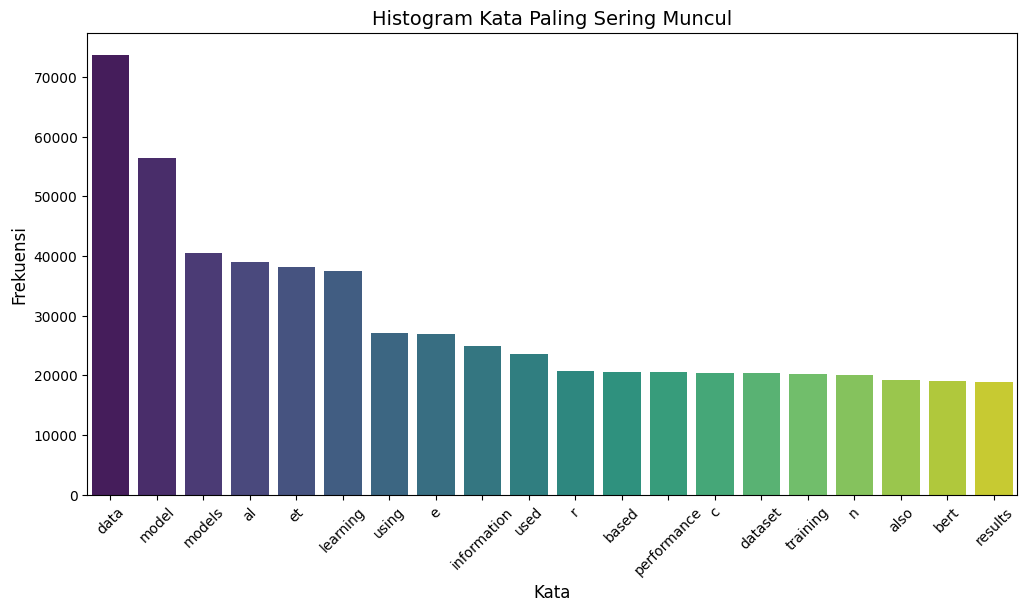

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ambil 20 kata paling sering
common_words = word_counts.most_common(20)
words, counts = zip(*common_words)  # Pisahkan kata dan jumlahnya

# Plot histogram
plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(counts), palette="viridis")

# Tambahkan label
plt.xlabel("Kata", fontsize=12)
plt.ylabel("Frekuensi", fontsize=12)
plt.xticks(rotation=45)  # Rotasi agar tidak bertumpuk
plt.title("Histogram Kata Paling Sering Muncul", fontsize=14)
plt.show()

### Visualisasi Word Cloud

In [20]:
!pip install wordcloud

  Using cached wordcloud-1.9.4-cp39-cp39-win_amd64.whl (300 kB)


You should consider upgrading via the 'C:\Users\HP 840 G8\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


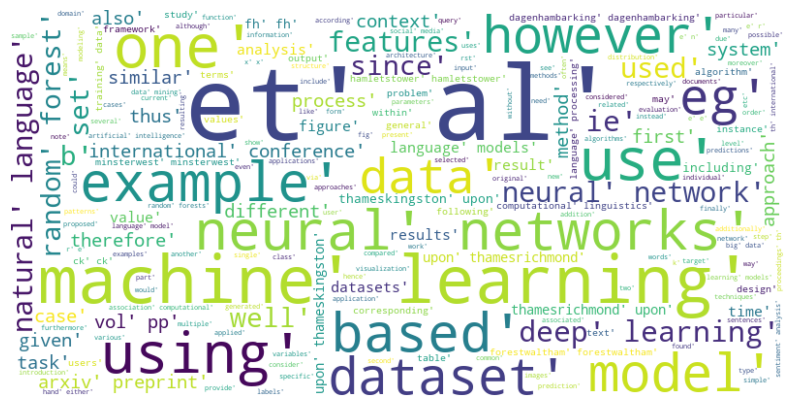

In [46]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Gabungkan semua token menjadi satu string
text = " ".join(df['tokens_no_stopwords'].explode())  

# Buat word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Visualisasi
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Panjang Kalimat (Sentence Length Distribution)

In [ ]:
import matplotlib.pyplot as plt

# Hitung panjang kalimat (jumlah kata dalam setiap kalimat)
df['sentence_length'] = df['tokens_no_stopwords'].apply(len)

# Visualisasi distribusi panjang kalimat
plt.figure(figsize=(10, 6))
plt.hist(df['sentence_length'], bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.title('Sentence Length Distribution')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Tambahkan grid untuk kejelasan
plt.show()

## Tokenizer Model BART

In [24]:
!pip install transformers

You should consider upgrading via the 'C:\Users\HP 840 G8\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [26]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BartTokenizer

In [27]:
# Load tokenizer BART
tokenizer = BartTokenizer.from_pretrained("facebook/bart-large-cnn")

In [28]:
# Sliding Window Tokenization
max_length = 1024  # Batas token BART
stride = 512       # Overlap antar potongan

In [52]:
def sliding_window_tokenization(text, max_length=1024, stride=512):
    tokenized_text = tokenizer.encode(text, truncation=False, add_special_tokens=True)
    
    # Jika teks lebih pendek dari max_length, langsung padding
    if len(tokenized_text) <= max_length:
        return tokenizer(
            text, 
            padding="max_length", 
            max_length=max_length, 
            truncation=True, 
            return_tensors="pt"
        )["input_ids"]

    # Jika teks lebih panjang, gunakan sliding window
    tokenized_chunks = []
    for i in range(0, len(tokenized_text), stride):
        chunk = tokenized_text[i:i + max_length]
        if len(chunk) < max_length:
            chunk += [tokenizer.pad_token_id] * (max_length - len(chunk))  # Padding
        tokenized_chunks.append(chunk)
        if len(chunk) < max_length:  # Stop jika kurang dari max_length
            break
    
    return torch.tensor(tokenized_chunks, dtype=torch.long)

In [53]:
# Memilih kolom yang digunakan
data_final = pd.read_csv("Data Final.csv")  
texts = data_final["clean_text"].tolist()
summaries = data_final["Summary"].tolist()

In [ ]:
# Tokenisasi teks dan ringkasan
tokenized_texts = [sliding_window_tokenization(text) for text in texts]
tokenized_summaries = [sliding_window_tokenization(summary) for summary in summaries]

In [ ]:
# Split dataset menjadi train dan test
train_texts, test_texts, train_summaries, test_summaries = train_test_split(
    tokenized_texts, tokenized_summaries, test_size=0.2, random_state=42
)

In [ ]:
# Konversi ke tensor untuk PyTorch
train_inputs = torch.cat(train_texts, dim=0)  # Gabungkan semua token hasil split
train_labels = torch.cat(train_summaries, dim=0)
test_inputs = torch.cat(test_texts, dim=0)
test_labels = torch.cat(test_summaries, dim=0)

In [ ]:
# Simpan dalam TensorDataset
train_dataset = TensorDataset(train_inputs, train_labels)
test_dataset = TensorDataset(test_inputs, test_labels)

In [ ]:
# Buat DataLoader untuk digunakan dalam model
batch_size = 8
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print("Data siap digunakan untuk model BART!")